# Homework 2

In [1]:
%%capture
!pip install qiskit
import numpy as np
import qiskit as qk
from sympy import *

In [12]:
with open('./token', 'r') as token_file:
    token = token_file.read()

In [13]:
%%capture
qk.IBMQ.save_account(token, overwrite = True)
qk.IBMQ.load_account()

In [14]:
provider = qk.IBMQ.get_provider(hub = 'ibm-q')

In [15]:
devices = provider.backends(filters=lambda x: (3 <= x.configuration().n_qubits <= 5) and not x.configuration().simulator)

In [16]:
devices

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [17]:
simd_backend = qk.Aer.get_backend('qasm_simulator')

## Problem 1

If we look at the folloing equation:
$$\hat H \vert x \rangle = \frac{1}{\sqrt 2} \left\{ \vert 0 \rangle + (-1)^{x} \vert 1 \rangle\right\}$$.
We can apply it as it is prescripted in Deutch's algorithm: 
$$\hat{H}_x \hat{H}_y \hat{U}_f \hat{H}_x \vert 0 \rangle_x \otimes \vert 0 \rangle_y = \hat{H}_x \hat{H}_y \hat{U}_f \frac{1}{\sqrt 2} (\vert 0 \rangle_x \otimes \vert 0 \rangle_y + \vert 1 \rangle_x \otimes \vert 0 \rangle_y)$$
Oracle gives us by definition:
$$=\hat{H}_x \hat{H}_y \frac{1}{\sqrt 2} (\vert 0 \rangle_x \otimes \vert f(0) \rangle_y + \vert 1 \rangle_x \otimes \vert f(1) \rangle_y) = \hat{H}_x \frac{1}{2} (\vert 0 \rangle_x \otimes \vert f(0) \rangle_y + \vert 1 \rangle_x \otimes \vert f(0) \rangle_y + \vert 0 \rangle_x \otimes \vert f(1) \rangle_y - \vert 1 \rangle_x \otimes \vert f(1) \rangle_y) = \frac{1}{2 \sqrt 2 } \left(\vert 0 \rangle_x \otimes ( \vert 0 \rangle_y + (-1)^{f(0)} \vert 1 \rangle_y) + \vert 1 \rangle_x \otimes (\vert 0 \rangle_y +(-1)^{f(0)}  \vert 1 \rangle_y)+ \vert 0 \rangle_x \otimes (\vert 0 \rangle_y + (-1)^{f(1)} \vert 1 \rangle_y) - \vert 1 \rangle_x \otimes (\vert 0 \rangle_y + (-1)^{f(1)} \vert 1 \rangle_y\right) = \frac{1}{\sqrt 2}\vert 0 \rangle_x \vert 0 \rangle_y + (-1)^{f(0)} \left\{
    \begin{aligned}
         \vert 0 \rangle_x \vert 1 \rangle_y & & f(0) = f(1)\\
         \vert 1 \rangle_x \vert 1 \rangle_y & & f(0) \neq f(1)
    \end{aligned}
    \right.
$$
We can see that probability to measure useless zero state is $P(\vert 0 \rangle_x \vert 0 \rangle_y) = \frac{1}{2}$  On the other hand we can use info about measurements of other qubits: $P(\vert 0 \rangle_x \vert 1 \rangle_y) = \frac{1}{2},~f(0)=f(1)$ or $P(\vert 1 \rangle_x \vert 1 \rangle_y) = \frac{1}{2},~f(0)\neq f(1)$. It gives us enough info about structure of function. 

## Problem 2

1)

We need to prove the following equation:
$$\hat{H}^{\otimes n} \vert \pmb{x} \rangle = \frac{1}{\sqrt{2^n}} \sum_{\pmb z} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle$$
Using Dirac's notation,we can rewrite it in the following way:
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{\pmb z, \pmb x} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle \langle \pmb{x} \vert$$
If we write one-q-bit Hadamard operator in explicit form, we wold be able to expand tensor product:
$$\hat{H} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \sum_{x_1,y_1} (-1)^{\pmb{x}_1 \pmb{z}_1} \vert \pmb{x}_1 \rangle \langle \pmb{z}_1 \vert$$
$$\hat{H}^{\otimes n} = \frac{1}{\sqrt{2^n}} \left\{ \sum_{x_1,y_1} (-1)^{{x}_1 {z}_1} \vert {x}_1 \rangle \langle {z}_1 \vert \right\} \otimes \left\{ \sum_{x_2,y_2} (-1)^{{x}_2 {z}_2} \vert {x}_2 \rangle \langle {z}_2 \vert \right\} \otimes \cdots \otimes \left\{ \sum_{x_n,y_n} (-1)^{{x}_n {z}_n} \vert {x}_n \rangle \langle {z}_n \vert \right\} = ... = \frac{1}{\sqrt{2^n}} \sum_{x_1,\cdots,x_n \vert y_1,\cdots,y_n} (-1)^{x_1 y_1} \cdot (-1)^{x_n y_n} \cdot \left\{\vert {x}_1 \rangle \otimes \cdots \otimes \vert {x}_n \rangle\right\} \left\{\langle {z}_1 \vert \otimes \cdots \otimes \langle {z}_n \vert\right\}$$
What we are to prove.

2)

We need to prove the following equation:
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb x \rangle + \vert \pmb y \rangle\} = \frac{1}{\sqrt{2^{n+1}}} \sum_{\pmb z\in \pmb{s}^{\perp}} (-1)^{\pmb x \cdot \pmb z} \vert \pmb z \rangle$$
assuming $\pmb{s}^\perp=\{(\pmb x \oplus \pmb y) \cdot \pmb z = 0\}$

Let's decompose $\vert \pmb y \rangle$ to $\vert \pmb y \rangle = \vert \pmb{x}_0 \oplus \pmb a \rangle.$ 
Using previous identity it will give us:
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle\} = \frac{1}{\sqrt{2^{n+1}}} \sum_{\pmb z} \{(-1)^{\pmb{x}_0 \cdot \pmb z} + (-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z}\} \vert \pmb z \rangle$$
Decomposing $(-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z}\}$ to factors we have:
$$(-1)^{\pmb{x}_0 \cdot \pmb z} + (-1)^{(\pmb{x}_0 \oplus \pmb{a}) \cdot \pmb z} = 
    \left\{
    \begin{aligned}
        &0 & &\pmb a \cdot \pmb z = 1\\
        &2 (-1)^{\pmb {x}_0 \cdot \pmb z} & & \pmb a \cdot \pmb z = 0
    \end{aligned}
    \right.$$

Returning to the equation it will give us what we are to prove
$$\hat{H}^{\otimes n} \frac{1}{\sqrt 2} \{\vert \pmb{x}_0 \rangle + \vert \pmb{x}_0 \oplus \pmb a \rangle\} = \frac{1}{\sqrt{2^{n-1}}} \sum_{\pmb a \cdot \pmb z = 0} (-1)^{\pmb{x}_0 \cdot \pmb z} \vert \pmb z \rangle$$

## Problem 3

We will start from building a quantum machine to run a Simon's algorithm. We will use a package that is not included in standart qiskit.

In [70]:
%%capture
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [71]:
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
from qiskit import Aer
aer_backend = Aer.get_backend('unitary_simulator')

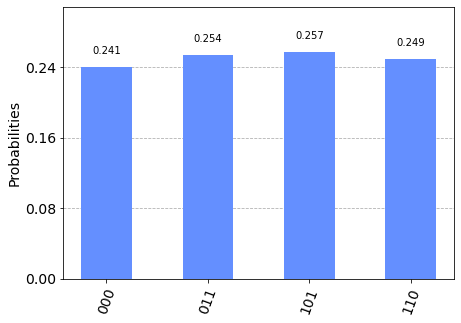

In [72]:
a = '111' #Preparation of the quantum machine
n = len(a)
simon_circuit = qk.QuantumCircuit(n * 2, n)
simon_circuit.h(range(n))  
simon_circuit.barrier()
simon_circuit += simon_oracle(a)
simon_circuit.barrier()
simon_circuit.h(range(n))
simon_circuit.measure(range(n), range(n))
result = qk.execute(simon_circuit, backend = simd_backend, shots = 8192).result()
counts = result.get_counts()
simon_circuit.draw()
plot_histogram(counts)

As we can see, probabilites of getting these satates are almost equal. Let's check what we can obtain from theory.

In [73]:
prepare_circuit = qk.QuantumCircuit(n * 2, n) #building an equivalent operator for our circuit
prepare_circuit.h(range(n))  
prepare_circuit.barrier()
prepare_circuit += simon_oracle(a)
prepare_circuit.barrier()
prepare_circuit.h(range(n))
prep_results = qk.execute(prepare_circuit, backend = aer_backend).result()
prepare_circuit.draw()
simon_matrix = prep_results.get_unitary(prepare_circuit, decimals = 1)
print(simon_matrix)
print(simon_matrix.shape)

[[0.25-4.59242550e-17j 0.  +4.59242550e-17j 0.  +4.59242550e-17j ...
  0.  +0.00000000e+00j 0.  +0.00000000e+00j 0.  +0.00000000e+00j]
 [0.  +4.59242550e-17j 0.25-7.65404249e-17j 0.25-7.65404249e-17j ...
  0.  +0.00000000e+00j 0.  +0.00000000e+00j 0.  +0.00000000e+00j]
 [0.  +4.59242550e-17j 0.25-7.65404249e-17j 0.25-7.65404249e-17j ...
  0.  +0.00000000e+00j 0.  +0.00000000e+00j 0.  +0.00000000e+00j]
 ...
 [0.  +0.00000000e+00j 0.  +0.00000000e+00j 0.  +0.00000000e+00j ...
  0.25-1.07156595e-16j 0.25-1.07156595e-16j 0.  +4.59242550e-17j]
 [0.  +0.00000000e+00j 0.  +0.00000000e+00j 0.  +0.00000000e+00j ...
  0.25-1.07156595e-16j 0.25-1.07156595e-16j 0.  +4.59242550e-17j]
 [0.  +0.00000000e+00j 0.  +0.00000000e+00j 0.  +0.00000000e+00j ...
  0.  +4.59242550e-17j 0.  +4.59242550e-17j 0.25-1.37772765e-16j]]
(64, 64)


In [90]:
init_state = np.zeros(64) #rewriting simon matrix in form of measured probabilities
init_state[0] = 1.
simon_vec = simon_matrix @ init_state
simon_res = np.real(simon_vec * np.conjugate(simon_vec))
simon_res

array([6.25000000e-02, 2.10903719e-33, 2.10903719e-33, 6.25000000e-02,
       2.10903719e-33, 6.25000000e-02, 6.25000000e-02, 2.10903719e-33,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.25000000e-02, 2.34337466e-34, 2.34337466e-34, 6.25000000e-02,
       2.34337466e-34, 6.25000000e-02, 6.25000000e-02, 2.34337466e-34,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.25000000e-02, 2.34337466e-34, 2.34337466e-34, 6.25000000e-02,
       2.34337466e-34, 6.25000000e-02, 6.25000000e-02, 2.34337466e-34,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.25000000e-02, 2.34337466e-34, 2.34337466e-34, 6.25000000e-02,
       2.34337466e-34, 6.25000000e-02, 6.25000000e-02, 2.34337466e-34,
      

In [91]:
def to_str(num, length = 64):
    rep = "{0:b}".format(num)
    return '0' * (length - len(rep)) + rep
def prob_num(num, res, mask = 8, length = 64):
    assert len(res.shape) == 1
    rep = to_str(num)
    acc = 0.
    for i, e in enumerate(res):
        i_rep = to_str(i, length)
        acc += 4 * (e if i_rep[::-1][:mask] == rep[::-1][:mask] else 0)
    return acc

In [92]:
res = [prob_num(i, simon_res) for i in range(8)]
res, sum(res)

([0.2500000000000001,
  8.436148777472957e-33,
  8.436148777472957e-33,
  0.2500000000000001,
  8.436148777472957e-33,
  0.2500000000000001,
  0.2500000000000001,
  8.436148777472957e-33],
 1.0000000000000004)

Only $000, 011,101, 110$ vectors can be result of this circuit. Moreover they have equal possibility to be realized. Little numbers in output should be manually set to zeros because they are calculation mistakes which came out from rough calculations on simon matrix.  

Now we will check all the numbers as input to see if systems are sovable. This will give us probability to find period. 

In [96]:
vecs = [np.array([0, 0, 0], dtype = 'bool'), np.array([0, 1, 1], dtype = 'bool'), np.array([1, 0, 1], dtype = 'bool'), np.array([1, 1, 0], dtype = 'bool')]
zeros, ones = 0, 0
mat = np.zeros((3, 4))
for a in vecs:
    mat[:, 0] = a[:]
    for b in vecs:
        mat[:, 1] = b[:]
        for c in vecs:
            mat[:, 2] = c[:]
            for d in vecs:
                mat[:, 3] = d[:]
                mat_0, mat_1 = mat[:,:-1], mat[:,1:]
                det_0, det_1 = np.linalg.det(mat_0), np.linalg.det(mat_1)
                is_suitable = bool(det_0) | bool(det_1)
                if is_suitable:
                    ones += 1
                else:
                    zeros += 1
print(zeros, ones)

214 42


## Problem 4 

1)

Actually Grover's search algorithm is based on the amplitude amplification technique. In basic words it's an iterative algorithm that increases probability to find right answer on every step. 

Actually it can be decomposed in the following way:
1. Initial state preparation by Hadamar's operators. $\vert s \rangle = \hat{H}^{\otimes (n+1)} \vert 0 \rangle$. After this stage stet vector is distrubuted uniformly.
2. Oracle's reflection. It reflects state around plane orthogonal to target vector $\vert w \rangle$: $ \vert s \rangle = \sin \theta \vert w \rangle + \cos \theta \vert s' \rangle$.
3. After-reflection that moves state towards the target one rotatin it around $\vert s \rangle$. $2\vert s \rangle \langle s \vert - 1$.

We can repeat it to increase probability to find answer.

### Sub-Task \#2

Let's create 2-QBits Grover's algorithm with tarket state $\vert w\rangle = \vert 11 \rangle$. That implies Oracle in form of CZ gate. Thus:

In [32]:
qc = qk.QuantumCircuit(2, 2)
#Preparation
qc.h(range(2))
#Oracle
qc.cz(0, 1)
#Grover's diffusion
qc.h(range(2))
qc.z(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.barrier()
qc.measure(range(2), range(2))

In [33]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
     ├───┤ │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
     └───┘   └───┘└───┘   └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

In [34]:
res = qk.execute(qc, shots = 65536, backend = simd_backend).result()

In [35]:
stt = res.get_counts()

In [36]:
stt

{'11': 65536}

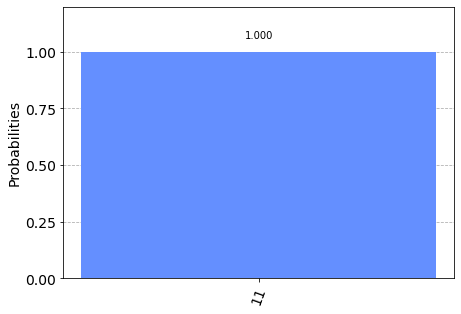

In [37]:
plot_histogram(stt)

Thus Grover's algorithm is performed once and gives right answer 

### Sub-Task \#3 

In [38]:
qc = qk.QuantumCircuit(2, 2)
qc.h(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.z(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.barrier()
qc.cz(0, 1)
qc.h(range(2))
qc.z(range(2))
qc.cz(0, 1)
qc.h(range(2))
qc.barrier()
qc.measure(range(2), range(2))

In [39]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐ ░    ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
     ├───┤ │ ├───┤├───┤ │ ├───┤ ░  │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
     └───┘   └───┘└───┘   └───┘ ░    └───┘└───┘   └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════════╩══╩═
                                                           0  1

In [40]:
res = qk.execute(qc, shots = 65536, backend = simd_backend).result()

In [41]:
stt = res.get_counts()

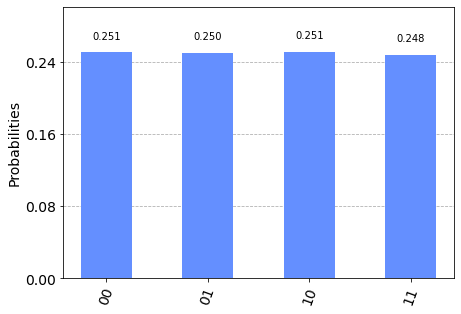

In [42]:
plot_histogram(stt)

It disperses probabilities across all qbits.